In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a_df=pd.read_csv(r"C:\Users\kandu\OneDrive\Desktop\olympics\athlete_events.csv")
noc_df=pd.read_csv(r"C:\Users\kandu\OneDrive\Desktop\olympics\noc_regions.csv")


In [3]:
a_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
a_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
a_df.shape

(271116, 15)

In [7]:
a_df=a_df.merge(noc_df,on='NOC',how='left')

## summer dataset

In [8]:
summer_df=a_df[a_df['Season']=='Summer']

In [9]:
summer_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
summer_df.shape

(222552, 17)

In [11]:
summer_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
summer_df.duplicated().sum()


1385

In [13]:
summer_df.drop_duplicates(inplace=True)
summer_df.duplicated().sum()

C:\Users\kandu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [14]:
summer_df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [15]:
summer_athe_df=pd.concat([summer_df,pd.get_dummies(summer_df['Medal'])],axis=1)
summer_athe_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [16]:
summer_athe_df.shape

(221167, 20)

In [17]:
summer_athe_df=summer_athe_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [18]:
summer_athe_df['Total']=summer_athe_df['Gold']+summer_athe_df['Silver']+summer_athe_df['Bronze']

In [19]:
summer_athe_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,1
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,...,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1,1
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,...,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0,1
271087,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0,0
271088,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0,0


## Olympics Analysis for summer

#### Medal over NOC

In [20]:
summer_athe_df.groupby('NOC').sum()[['Gold','Silver','Bronze','Total']].sort_values('Gold',ascending=False).reset_index().head(30)


,NOC,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,URS,394.0,317.0,294.0,1005.0
2,GBR,278.0,317.0,300.0,895.0
3,GER,235.0,261.0,283.0,779.0
4,FRA,234.0,256.0,287.0,777.0
5,CHN,227.0,162.0,153.0,542.0
6,ITA,219.0,191.0,198.0,608.0
7,HUN,178.0,154.0,172.0,504.0
8,GDR,153.0,129.0,127.0,409.0
9,RUS,153.0,143.0,164.0,460.0


#### Medal over Region

In [21]:
summer_athe_df.groupby(['Year','region']).sum()[['Gold','Silver','Bronze','Total']]

Gold  Silver  Bronze  Total
Year region                                              
1896 Australia                   2       0       1      3
     Austria                     2       1       2      5
     Denmark                     1       2       3      6
     France                      5       4       2     11
     Germany                     7       5       2     14
...                            ...     ...     ...    ...
2016 Virgin Islands, British     0       0       0      0
     Virgin Islands, US          0       0       0      0
     Yemen                       0       0       0      0
     Zambia                      0       0       0      0
     Zimbabwe                    0       0       0      0

[2769 rows x 4 columns]

#### Medal over event

In [22]:
summer_athe_df.groupby(['Year','Event','region']).sum()[['Gold','Silver','Bronze','Total']].reset_index()

,Year,Event,region,Gold,Silver,Bronze,Total
0,1896,"Athletics Men's 1,500 metres",Australia,1,0,0,1
1,1896,"Athletics Men's 1,500 metres",France,0,0,1,1
2,1896,"Athletics Men's 1,500 metres",Germany,0,0,0,0
3,1896,"Athletics Men's 1,500 metres",Greece,0,0,0,0
4,1896,"Athletics Men's 1,500 metres",USA,0,1,0,1
...,...,...,...,...,...,...,...
97086,2016,"Wrestling Women's Middleweight, Freestyle",Sweden,0,0,0,0
97087,2016,"Wrestling Women's Middleweight, Freestyle",Tunisia,0,0,0,0
97088,2016,"Wrestling Women's Middleweight, Freestyle",Turkey,0,0,0,0
97089,2016,"Wrestling Women's Middleweight, Freestyle",USA,0,0,0,0


#### Medal over Player

In [23]:
summer_athe_df.groupby(['Year','Name','Sport']).sum()[['Gold','Silver','Bronze']]

Gold  Silver  Bronze
Year Name                             Sport                           
1896 Alajos (Aljoz) Szokoly (-Szokol) Athletics      0       0       1
     Albert Baumann                   Shooting       0       0       0
     Albert Clinton Tyler             Athletics      0       1       0
     Albin Georges Lermusiaux         Athletics      0       0       1
                                      Shooting       0       0       0
...                                                ...     ...     ...
2016 ukasz Kubot                      Tennis         0       0       0
     urea Esther "Aury" Cruz          Volleyball     0       0       0
     va Csernoviczki                  Judo           0       0       0
     va Risztov                       Swimming       0       0       0
     zge Bayrak                       Badminton      0       0       0

[84157 rows x 3 columns]

#### City wise player names

In [24]:
summer_athe_df.groupby(['Name','City','region','Medal']).sum()[['Gold','Silver','Bronze']].head(50)


Gold  \
Name                                 City           region                      Medal          
A. Dubois                            Paris          France                      Bronze     0   
                                                                                Silver     0   
Aage Birch                           Mexico City    Denmark                     Silver     0   
Aage Ernst Larsen                    London         Denmark                     Silver     0   
Aage Ingvar Eriksen                  London         Norway                      Silver     0   
Aage Jrgen Christian Andersen        Athina         Denmark                     Gold       1   
Aagje "Ada" Kok (-van der Linden)    Mexico City    Netherlands                 Gold       1   
                                     Tokyo          Netherlands                 Silver     0   
Aale Maria Tynni (-Pirinen, -Haavio) London         Finland                     Gold       1   
Aarne Eemeli Reini                   Berlin         Finland                     Silver     0   
Aaron John McIntosh                  Sydney         New Zealand                 Bronze     0   
Aaron Nigel Armstrong                Beijing        Trinidad                    Gold       1   
Aaron Ross Flood                     Berlin         USA                         Silver     0   
Aaron Wells Peirsol                  Athina         USA                         Gold       2   
                                     Beijing        USA                         Gold       1   
                                                                                Silver     0   
                                     Sydney         USA                         Silver     0   
Aas Mmmdov                           Athina         Azerbaijan                  Bronze     0   
Abas Arslanagi                       Munich         Serbia                      Gold       1   
Abbas Jadidi                         Atlanta        Iran                        Silver     0   
Abbos Atayev                         London         Uzbekistan                  Bronze     0   
Abdel Aal Ahmed Rashid               Helsinki       Egypt                       Bronze     0   
Abdel Hak Achik                      Seoul          Morocco                     Bronze     0   
Abdel Moneim El-Gindy                Roma           Syria                       Bronze     0   
Abdelghani "Ghani" Yalouz            Atlanta        France                      Silver     0   
Abderrahmane Hammad Zaheer           Sydney         Algeria                     Bronze     0   
Abdon Pamich                         Roma           Italy                       Bronze     0   
                                     Tokyo          Italy                       Gold       1   
Abdoul Razak Issoufou Alfaga         Rio de Janeiro Niger                       Silver     0   
Abdoulaye "Abdou" Sye Papa           Roma           France                      Bronze     0   
Abdul Wahid Aziz                     Roma           Iraq                        Bronze     0   
Abdul-Rashid Bulayevich Sadulayev    Rio de Janeiro Russia                      Gold       1   
Abdullah Al-Rashidi                  Rio de Janeiro Individual Olympic Athletes Bronze     0   
Abdullah Movahed Ardabili            Mexico City    Iran                        Gold       1   
Abdullo Tovashevich Tangriyev        Beijing        Uzbekistan                  Silver     0   
Abebe Bikila                         Roma           Ethiopia                    Gold       1   
                                     Tokyo          Ethiopia                    Gold       1   
Abel Kiprop Mutai                    London         Kenya                       Bronze     0   
Abel Kirui                           London         Kenya                       Silver     0   
Abel Ricardo Laudonio                Roma           Argentina                   Bronze     0   
Abel Richard Kiviat                  Stockholm      USA 

#### Year-wise Total Medals

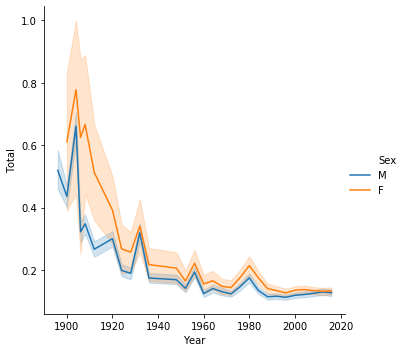

<Figure size 1080x648 with 0 Axes>

In [25]:
sns.relplot(x='Year',y='Total',data=summer_athe_df,hue='Sex',kind='line')
plt.figure(figsize=(15,9))
plt.show()

### County_wise Medal

In [26]:
def Country_wise(Country):
    a =summer_athe_df[summer_athe_df['NOC'] ==Country]
    b=a.groupby('NOC').sum()[['Gold','Silver','Bronze','Total']].sort_values('Gold',ascending=False).reset_index()
    return b

Country_wise('IND')

,NOC,Gold,Silver,Bronze,Total
0,IND,9,7,12,28


### region_wise Medal

In [27]:
def Region_wise(Country):
    a = summer_athe_df[summer_athe_df['region'] == Country]
    b=a.groupby(['Year','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b

Region_wise('India')


,Year,region,Gold,Silver,Bronze
0,1900,India,0,2,0
1,1920,India,0,0,0
2,1924,India,0,0,0
3,1928,India,1,0,0
4,1932,India,1,0,0
5,1936,India,1,0,0
6,1948,India,1,0,0
7,1952,India,1,0,1
8,1956,India,1,0,0
9,1960,India,0,1,0


### Event_wise Medal

In [28]:
def Event_wise(Country):
    a = summer_athe_df[summer_athe_df['region']==Country]
    b=a.groupby(['Year','Event','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Event_wise("India")


,Year,Event,region,Gold,Silver,Bronze
0,1900,Athletics Men's 100 metres,India,0,0,0
1,1900,Athletics Men's 110 metres Hurdles,India,0,0,0
2,1900,Athletics Men's 200 metres,India,0,1,0
3,1900,Athletics Men's 200 metres Hurdles,India,0,1,0
4,1900,Athletics Men's 60 metres,India,0,0,0
...,...,...,...,...,...,...
677,2016,"Wrestling Men's Light-Heavyweight, Greco-Roman",India,0,0,0
678,2016,"Wrestling Men's Welterweight, Freestyle",India,0,0,0
679,2016,"Wrestling Women's Featherweight, Freestyle",India,0,0,0
680,2016,"Wrestling Women's Flyweight, Freestyle",India,0,0,0


### Name-Wise Medal

In [29]:
def Name_wise(Country):
    a = summer_athe_df[summer_athe_df['region'] == Country]
    b=a.groupby(['Year','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Name_wise('India')

,Year,Name,Gold,Silver,Bronze
0,1900,Norman Gilbert Pritchard (-Trevor),0,2,0
1,1920,Duikar Randhir Shindes,0,0,0
2,1920,Kumar T. Navale,0,0,0
3,1920,Phadeppa Dareppa Chaugule,0,0,0
4,1920,Purma C. Bannerjee,0,0,0
...,...,...,...,...,...
573,2016,Tintu Luka,0,0,0
574,2016,Vikas Krishan Yadav,0,0,0
575,2016,Vikas Shive Gowda,0,0,0
576,2016,Vinesh Phogat,0,0,0


### City_wise Player

In [30]:
def City_wise(Country):
    a = summer_athe_df[summer_athe_df['region'] == Country]
    b=a.groupby(['Name','City','Medal']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
City_wise('India')


,Name,City,Medal,Gold,Silver,Bronze
0,Abhinav Bindra,Beijing,Gold,1,0,0
1,Gagan Narang,London,Bronze,0,0,1
2,Govinda Billimogaputtaswamy,Munich,Bronze,0,0,1
3,"Joseph Anthony ""Joe"" Antic",Roma,Silver,0,1,0
4,Karnam Malleswari,Sydney,Bronze,0,0,1
5,Khashaba Dadasaheb Jahdav,Helsinki,Bronze,0,0,1
6,Leander Adrian Paes,Atlanta,Bronze,0,0,1
7,Leslie Walter Claudius,Helsinki,Gold,1,0,0
8,Leslie Walter Claudius,London,Gold,1,0,0
9,Leslie Walter Claudius,Melbourne,Gold,1,0,0


### Sport_wise Medal & Player 

In [31]:
def Sport_wise(Country):
    a = summer_athe_df[summer_athe_df['region'] == Country]
    b=a.groupby(['Sport','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Sport_wise('India')

,Sport,Name,Gold,Silver,Bronze
0,Archery,Atanu Das,0,0,0
1,Archery,Dhulchand Damor,0,0,0
2,Archery,Dola Banerjee,0,0,0
3,Archery,Laishram Bombayla Devi,0,0,0
4,Archery,Mangal Singh Champia,0,0,0
...,...,...,...,...,...
462,Wrestling,Tarashkeswar Pandey,0,0,0
463,Wrestling,Udey Chand,0,0,0
464,Wrestling,Vinesh Phogat,0,0,0
465,Wrestling,Vinod Kumar,0,0,0


### Total_info

In [32]:
def Info_wise(Country):
    a = summer_athe_df[summer_athe_df['region'] == Country]
    b=a.groupby(['Year','Name','Event','City','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Info_wise("India")


,Year,Name,Event,City,region,Gold,Silver,Bronze
0,1900,Norman Gilbert Pritchard (-Trevor),Athletics Men's 100 metres,Paris,India,0,0,0
1,1900,Norman Gilbert Pritchard (-Trevor),Athletics Men's 110 metres Hurdles,Paris,India,0,0,0
2,1900,Norman Gilbert Pritchard (-Trevor),Athletics Men's 200 metres,Paris,India,0,1,0
3,1900,Norman Gilbert Pritchard (-Trevor),Athletics Men's 200 metres Hurdles,Paris,India,0,1,0
4,1900,Norman Gilbert Pritchard (-Trevor),Athletics Men's 60 metres,Paris,India,0,0,0
...,...,...,...,...,...,...,...,...
682,2016,Tintu Luka,Athletics Women's 800 metres,Rio de Janeiro,India,0,0,0
683,2016,Vikas Krishan Yadav,Boxing Men's Middleweight,Rio de Janeiro,India,0,0,0
684,2016,Vikas Shive Gowda,Athletics Men's Discus Throw,Rio de Janeiro,India,0,0,0
685,2016,Vinesh Phogat,"Wrestling Women's Flyweight, Freestyle",Rio de Janeiro,India,0,0,0


In [33]:
def Top_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Name','region']).sum()[['Gold','Silver','Bronze','Total']]
    c=b.sort_values('Total', ascending=False).reset_index()
    d=c.loc[0:14]
    return d


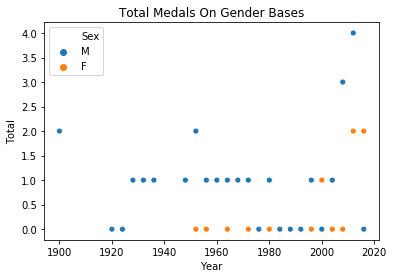

In [34]:
def scatter_plot(country):
    a = summer_athe_df[summer_athe_df['region'] == country]
    b = a.groupby(['Year','Sex']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c = sns.scatterplot(x=b['Year'], y=b['Total'], hue= b['Sex'])
    plt.title('Total Medals On Gender Bases')
    return c
scatter_plot('India')

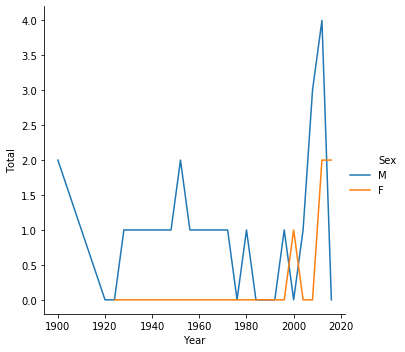

In [35]:
def country_lineplot(country):
    a = summer_athe_df[summer_athe_df['region'] == country]
    b=a.groupby(['Year','Sex']).sum()[['Gold','Silver','Bronze','Total']].reset_index()
    result=sns.relplot(x='Year', y='Total', hue='Sex',data=b,kind='line')
    return result
country_lineplot('India')

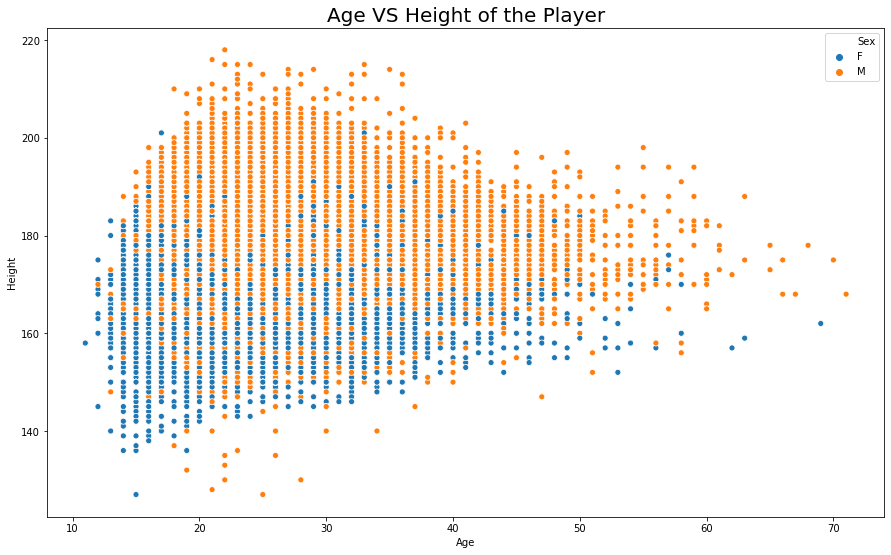

In [36]:
personality=summer_athe_df.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
plt.figure(figsize=(15,9))
plt.title("Age VS Height of the Player",fontdict={'fontsize':20})
sns.scatterplot(x='Age',y='Height',hue='Sex',data=personality)
plt.show()

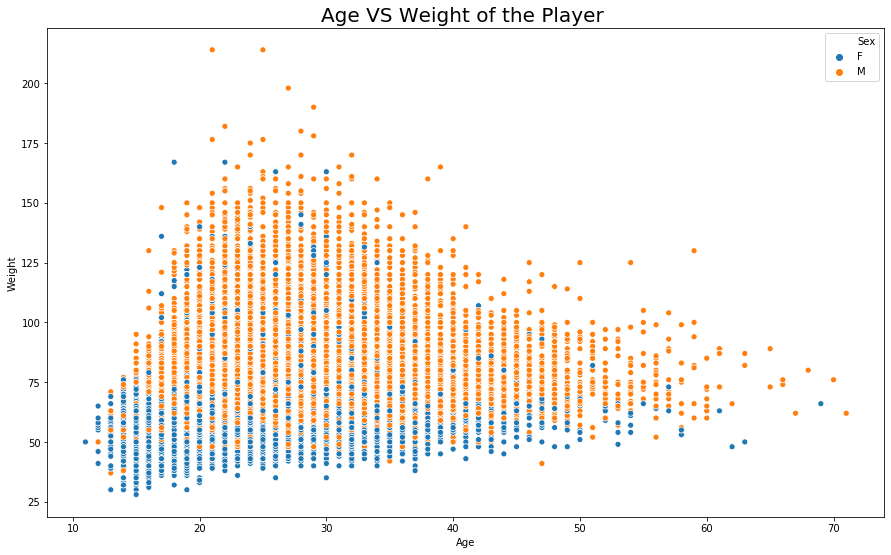

In [37]:
plt.figure(figsize=(15,9))
plt.title("Age VS Weight of the Player ",fontdict={'fontsize':20})
sns.scatterplot(x='Age',y='Weight',hue='Sex',data=personality)
plt.show()

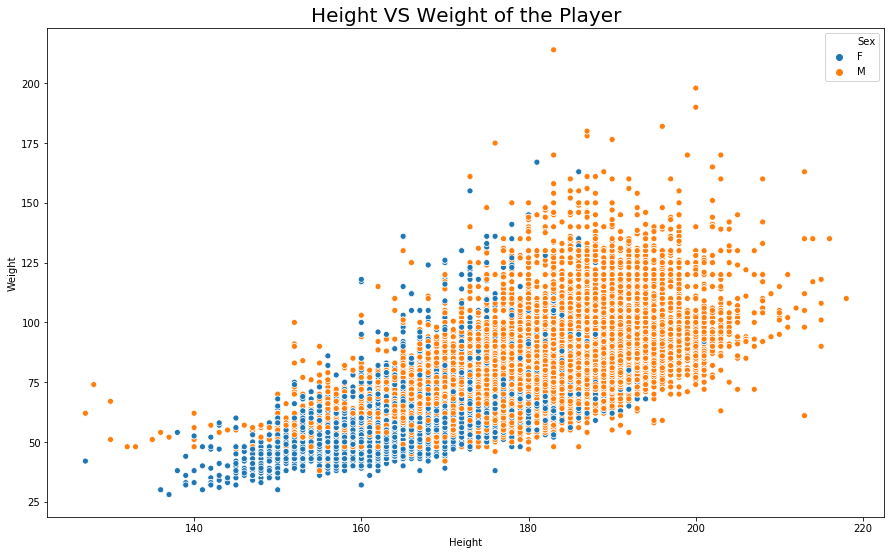

In [38]:
plt.figure(figsize=(15,9))
plt.title("Height VS Weight of the Player",fontdict={'fontsize':20})
sns.scatterplot(x='Height',y='Weight',hue='Sex',data=personality)
plt.show()

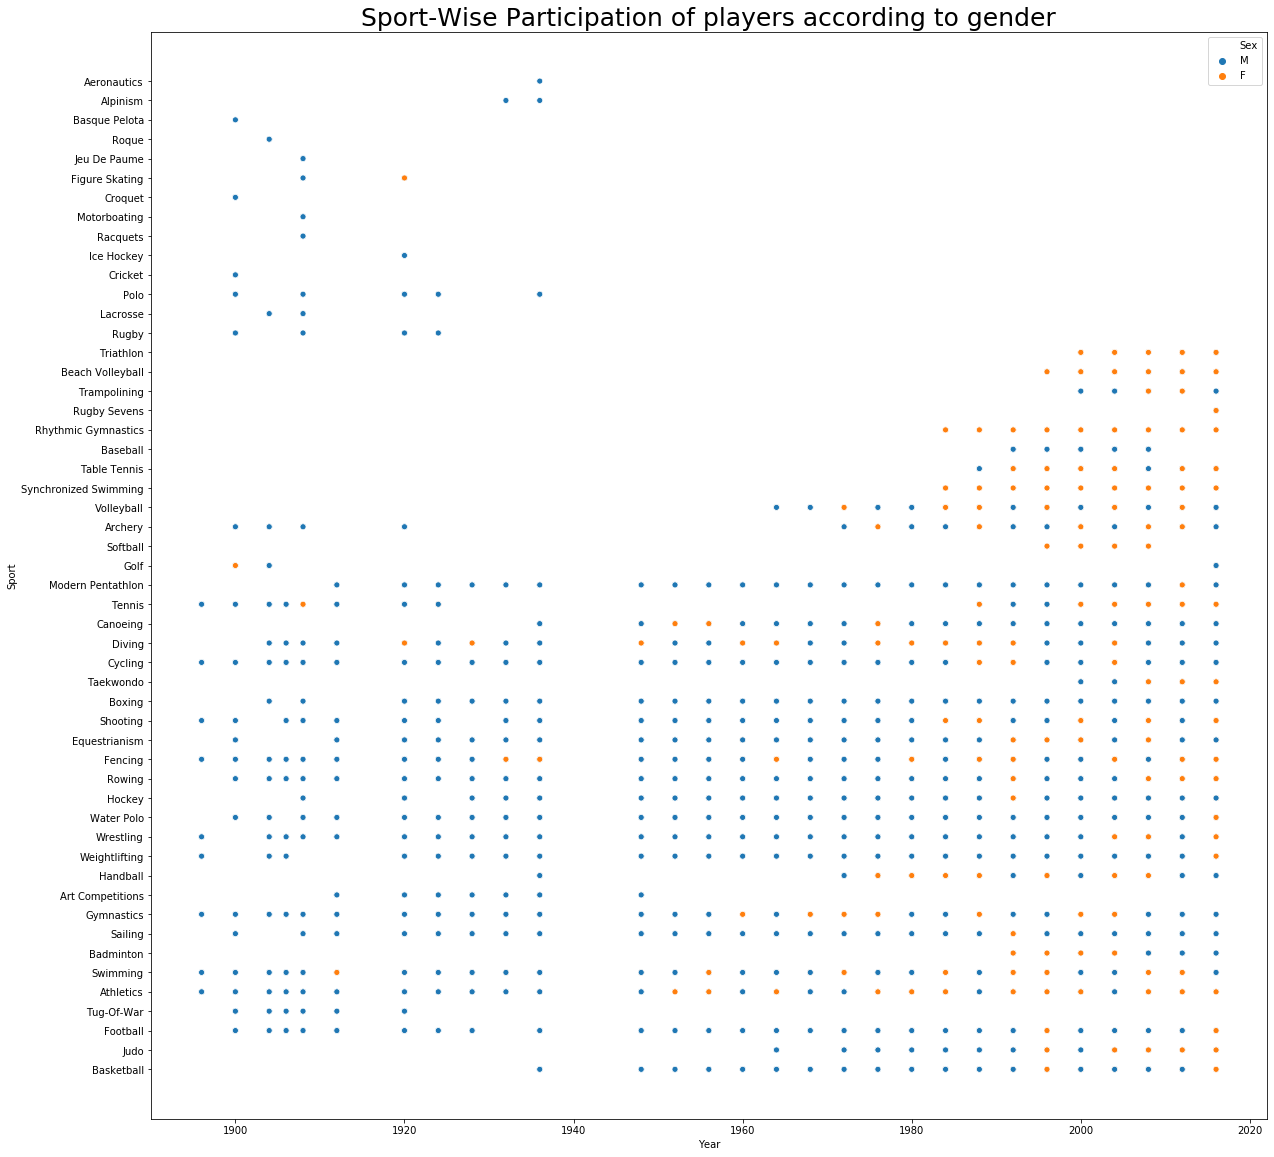

In [39]:
plt.figure(figsize=(20,20))
plt.title("Sport-Wise Participation of players according to gender",fontdict={'fontsize':25})
sns.scatterplot(x='Year',y='Sport',hue='Sex',data=summer_athe_df)
plt.show()

#####  Total  Analysis 

enter  country name:India
***Country_wise Medals:*** 
    NOC  Gold  Silver  Bronze
0  IND     9       7      12
***region_wise Medals:*** 
     Year region  Gold  Silver  Bronze
0   1900  India     0       2       0
1   1920  India     0       0       0
2   1924  India     0       0       0
3   1928  India     1       0       0
4   1932  India     1       0       0
5   1936  India     1       0       0
6   1948  India     1       0       0
7   1952  India     1       0       1
8   1956  India     1       0       0
9   1960  India     0       1       0
10  1964  India     1       0       0
11  1968  India     0       0       1
12  1972  India     0       0       1
13  1976  India     0       0       0
14  1980  India     1       0       0
15  1984  India     0       0       0
16  1988  India     0       0       0
17  1992  India     0       0       0
18  1996  India     0       0       1
19  2000  India     0       0       1
20  2004  India     0       1       0
21  2008  India     1  

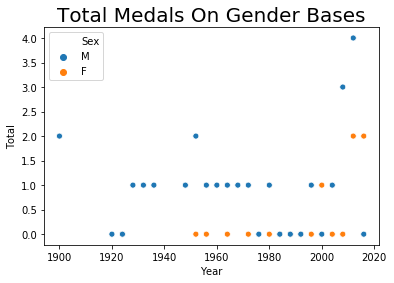

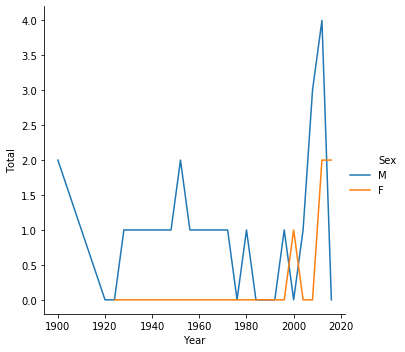

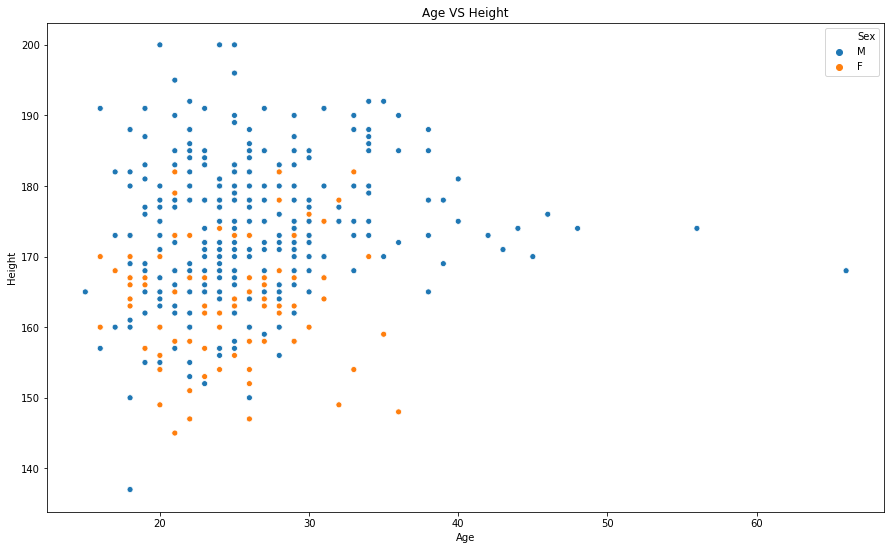

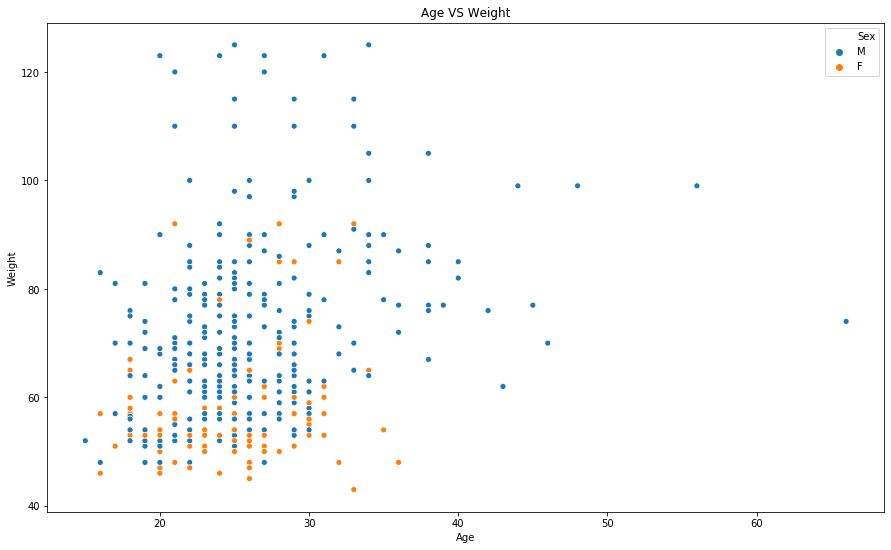

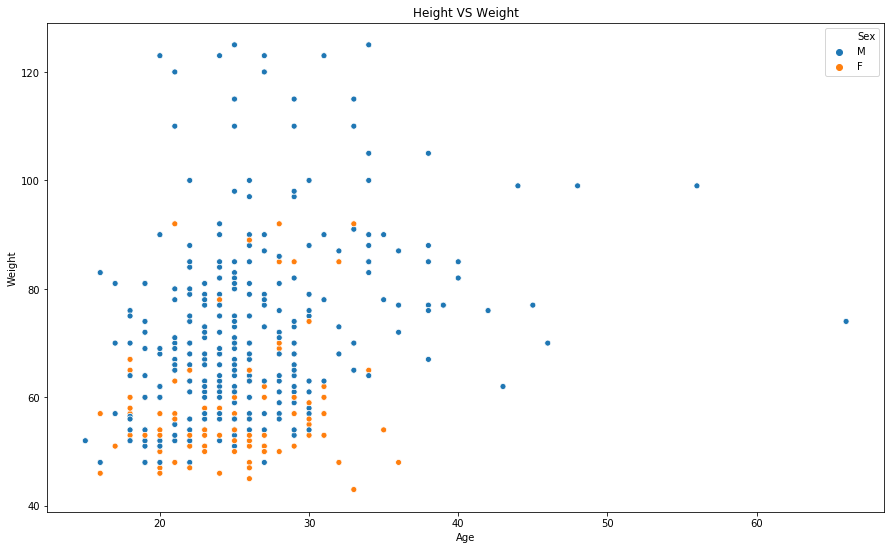

In [40]:
give=str(input("enter  country name:"))

def Country_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b= a.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    return b

print("***Country_wise Medals:***",'\n',Country_wise(give))
           
def Region_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Year','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***region_wise Medals:***",'\n',Region_wise(give))



def Event_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Year','Event']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***event_wise Medals:***",'\n',Event_wise(give))





def Name_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Year','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***Name_wise Medals:***",'\n',Name_wise(give))




def City_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Name','City']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***City_wise Medals:***",'\n',City_wise(give))





def Sport_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Sport','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***Sport_wise Medals:***",'\n',Sport_wise(give))








def Info_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Year','Name','Event','City','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***Info_wise Medals:***",'\n',Info_wise(give))



def Top_wise(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Name','region']).sum()[['Gold','Silver','Bronze','Total']]
    c=b.sort_values('Total', ascending=False).reset_index()
    d=c.loc[0:14]
    return d



print("***Top_15_wise Medals:***",'\n',Top_wise(give))



def country_scatterplot(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b = a.groupby(['Year','Sex','region']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c = sns.scatterplot(x=b['Year'], y=b['Total'], hue= b['Sex'])
    plt.title('Total Medals On Gender Bases',fontdict={'fontsize':20})
    return c


print(country_scatterplot(give))


def country_lineplot(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Year','Sex']).sum()[['Gold','Silver','Bronze','Total']].reset_index()
    result=sns.relplot(x='Year', y='Total', hue='Sex',data=b,kind='line')
    return result


print(country_lineplot(give))







def Height_scatter(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c=plt.figure(figsize=(15,9))
    c=plt.title("Age VS Height")
    c=sns.scatterplot(x='Age',y='Height',hue='Sex',data=b)
    return c
print(Height_scatter(give))





def Weight_scatter(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c=plt.figure(figsize=(15,9))
    c=plt.title("Age VS Weight")
    d=sns.scatterplot(x='Age',y='Weight',hue='Sex',data=b)
    return d
print(Weight_scatter(give))





def hei_wei_scatter(give):
    a = summer_athe_df[summer_athe_df['region'] == give]
    b=a.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c=plt.figure(figsize=(15,9))
    d=plt.title("Height VS Weight")
    e=sns.scatterplot(x='Age',y='Weight',hue='Sex',data=b)
    return d
print(hei_wei_scatter(give))

